<a href="https://colab.research.google.com/github/andy9806/visualization/blob/main/%EC%8B%9C%EA%B0%81%ED%99%94_%ED%94%84%EB%A1%9C%EC%A0%9D%ED%8A%B8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
path ='/content/drive/MyDrive/Colab Notebooks/데이터_엔지니어링/시각화/earthquake_data.csv'
df = pd.read_csv(path)

In [3]:
df['date'] = pd.to_datetime(df['date_time'])

In [4]:
df.drop(columns='date_time',inplace=True)

In [5]:
df['date_month'] = df.date.dt.month

In [6]:
war=[]
for i,j in zip(list(df.magnitude),list(df.alert)):
  if i<6.5:
    j = 'white'
  elif 6.5<=i<6.75:
    j = 'blue'
  elif 6.75<=i<7.0:
    j = 'green'
  elif 7.0<=i<7.5:
    j = 'yellow'
  elif 7.5<=i<8.0:
    j = 'orange'
  else:
    j = 'red'
  war.append(j)

In [7]:
df['warning'] = pd.Series(war)
x=list(df.longitude)
y=list(df.latitude)
pos = list(zip(y,x))
title_list = list(df.title)
date_list = list(df.date)
place = '/content/drive/MyDrive/Colab Notebooks/데이터_엔지니어링/시각화/PB2002_plates.json'

In [8]:
from folium import FeatureGroup,LayerControl

In [9]:
import folium

m = folium.Map(max_bounds=True,
           min_zoom=2,
           min_lat=-80,
           max_lat=90,
           min_lon=-180,
           max_lon=180)

folium.GeoJson(
    place,
    style_function=lambda feature: {
        'fillColor': '#000000',
        'color': 'white',
        'weight': 1        
    }
).add_to(m)

for i in range(len(df.index)):
  folium.Circle(pos[i],
                radius=10**3.5*(list(df.magnitude)[i]**2),
                
                color=war[i],
                popup=f'{title_list[i]}/ {list(df.magnitude)[i]} / {date_list[i]}').add_to(m)

In [10]:
def make_map(mapp):
  mappp = folium.Map(max_bounds=True,
           min_zoom=2,
           min_lat=-80,
           max_lat=90,
           min_lon=-180,
           max_lon=180)
  
  folium.GeoJson(place,style_function=lambda feature: {'fillColor': '#000000','color': 'white','weight': 1}).add_to(mappp)

  if mapp == 'Blue(6.5~6.75)':
    for i in range(len(df.index)):
      if war[i]=='blue':
        folium.Circle(pos[i],
                radius=10**3.5*(list(df.magnitude)[i]**2),     
                color=war[i],
                popup=f'{title_list[i]}/ {list(df.magnitude)[i]} / {date_list[i]}').add_to(mappp)
            
  if mapp == 'Green(6.75~7.0)':
    for i in range(len(df.index)):
      if war[i]=='green':
        folium.Circle(pos[i],
                radius=10**3.5*(list(df.magnitude)[i]**2),     
                color=war[i],
                popup=f'{title_list[i]}/ {list(df.magnitude)[i]} / {date_list[i]}').add_to(mappp)
              
  if mapp == 'Yellow(7.0~7.5)':
    for i in range(len(df.index)):
      if war[i]=='yellow':
        folium.Circle(pos[i],
                radius=10**3.5*(list(df.magnitude)[i]**2),     
                color=war[i],
                popup=f'{title_list[i]}/ {list(df.magnitude)[i]} / {date_list[i]}').add_to(mappp)

  if mapp == 'Orange(7.5~8.0)':
    for i in range(len(df.index)):
      if war[i]=='orange':
        folium.Circle(pos[i],
                radius=10**3.5*(list(df.magnitude)[i]**2),     
                color=war[i],
                popup=f'{title_list[i]}/ {list(df.magnitude)[i]} / {date_list[i]}').add_to(mappp)

  if mapp == 'Red(8.0~)':
    for i in range(len(df.index)):
      if war[i]=='red':
        folium.Circle(pos[i],
                radius=10**3.5*(list(df.magnitude)[i]**2),     
                color=war[i],
                popup=f'{title_list[i]}/ {list(df.magnitude)[i]} / {date_list[i]}').add_to(mappp)

  return display(mappp)

In [20]:
option = 'Blue(6.5~6.75)' #@param ['Blue(6.5~6.75)','Green(6.75~7.0)','Yellow(7.0~7.5)','Orange(7.5~8.0)','Red(8.0~)','Entire']
if option =='Blue(6.5~6.75)':
  make_map('Blue(6.5~6.75)')
elif option =='Green(6.75~7.0)':
  make_map('Green(6.75~7.0)')
elif option =='Yellow(7.0~7.5)':
  make_map('Yellow(7.0~7.5)')
elif option =='Orange(7.5~8.0)':
  make_map('Orange(7.5~8.0)')
elif option =='Red(8.0~)':
  make_map('Red(8.0~)')
else:
  display(m)

In [12]:
mab = folium.Map(max_bounds=True,
           min_zoom=2,
           min_lat=-80,
           max_lat=90,
           min_lon=-180,
           max_lon=180)

folium.GeoJson(
    place,
    style_function=lambda feature: {
        'fillColor': '#000000',
        'color': 'white',
        'weight': 1        
    }
).add_to(mab)

In [13]:
bblue = FeatureGroup(name='blue(6.5~6.75)')
ggreen = FeatureGroup(name='green(6.75~7.0)')
yyellow = FeatureGroup(name='yellow(7.0~7.5)')
oorange = FeatureGroup(name='orange(7.5~8.0)')
rred = FeatureGroup(name='red(8.0~)')

In [14]:
for i in range(len(df.index)):
  if war[i]=='blue':
    folium.Circle(pos[i],
                radius=10**3.5*(list(df.magnitude)[i]**2),     
                color=war[i],
                popup=f'{title_list[i]}/ {list(df.magnitude)[i]} / {date_list[i]}').add_to(bblue)
  
  elif war[i]=='green':
    folium.Circle(pos[i],
                radius=10**3.5*(list(df.magnitude)[i]**2),     
                color=war[i],
                popup=f'{title_list[i]}/ {list(df.magnitude)[i]} / {date_list[i]}').add_to(ggreen)

  elif war[i]=='yellow':
    folium.Circle(pos[i],
                radius=10**3.5*(list(df.magnitude)[i]**2),     
                color=war[i],
                popup=f'{title_list[i]}/ {list(df.magnitude)[i]} / {date_list[i]}').add_to(yyellow)

  elif war[i]=='orange':
    folium.Circle(pos[i],
                radius=10**3.5*(list(df.magnitude)[i]**2),     
                color=war[i],
                popup=f'{title_list[i]}/ {list(df.magnitude)[i]} / {date_list[i]}').add_to(oorange)
                
  elif war[i]=='red':
    folium.Circle(pos[i],
                radius=10**3.5*(list(df.magnitude)[i]**2),     
                color=war[i],
                popup=f'{title_list[i]}/ {list(df.magnitude)[i]} / {date_list[i]}').add_to(rred)

In [15]:
bblue.add_to(mab)
ggreen.add_to(mab)
yyellow.add_to(mab)
oorange.add_to(mab)
rred.add_to(mab)

LayerControl().add_to(mab)

In [16]:
mab

In [17]:
df['date_year'] = df.date.dt.year
a = list(df.date_year.unique())
a.sort()

<AxesSubplot:xlabel='magnitude', ylabel='Count'>

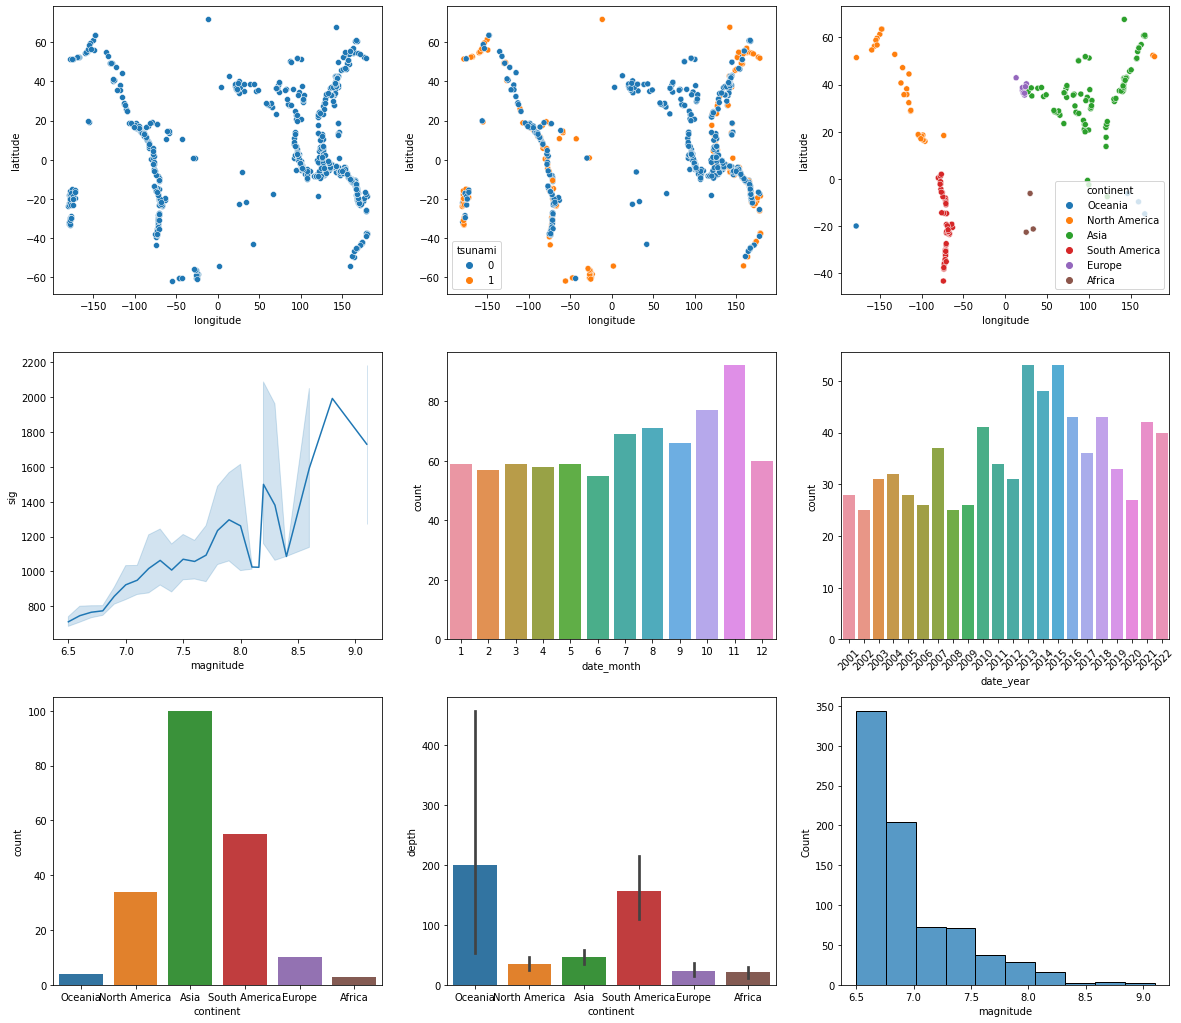

In [18]:
fig, axs = plt.subplots(3,3,figsize = (20,18))
sns.scatterplot(data=df,x='longitude',y='latitude', ax = axs[0,0])
sns.scatterplot(data=df,x='longitude',y='latitude',hue='tsunami', ax = axs[0,1])
sns.scatterplot(data=df,x='longitude',y='latitude',hue='continent', ax = axs[0,2])
sns.lineplot(data=df,x='magnitude',y='sig',ax = axs[1,0])
sns.countplot(data=df,x='date_month',ax = axs[1,1])
sns.countplot(data=df,x='date_year',ax = axs[1,2])
axs[1,2].set_xticklabels(a,rotation = 45);
sns.countplot(data=df,x='continent',ax = axs[2,0])
sns.barplot(data=df,x='continent',y='depth',ax = axs[2,1])
sns.histplot(data=df,x='magnitude',bins=10, ax = axs[2,2])